In [1]:
import os
import sys
import pandas as pd
import statsmodels.api as sm

# import the TimeSeriesAnalysis class
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from time_series_analysis import TimeSeriesAnalysis







In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')


In [3]:
print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Ensure it's in datetime format
df.set_index('Timestamp', inplace=True)           # Set as the DataFrame index


In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.0000

In [6]:
# Instantiate the TimeSeriesAnalysis class
time_series = TimeSeriesAnalysis(df)

c:\Users\azazh.wuletawu\Documents\10-academy\projects\week-0\solar-power-analytics\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


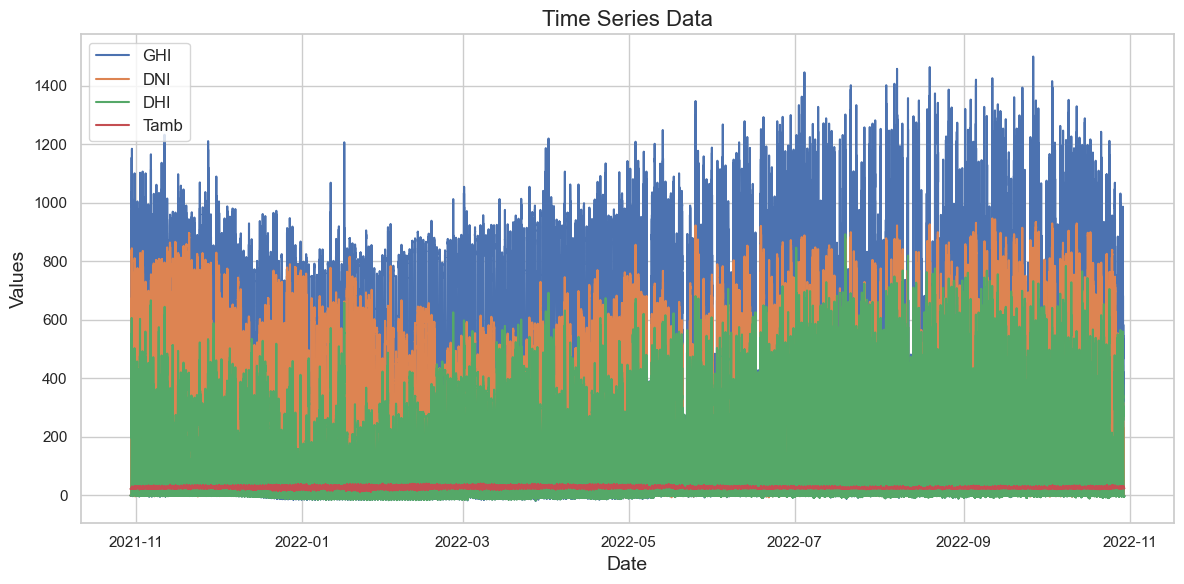

In [7]:
# 1. Plot the time series data
time_series.plot_time_series(['GHI', 'DNI', 'DHI', 'Tamb'])

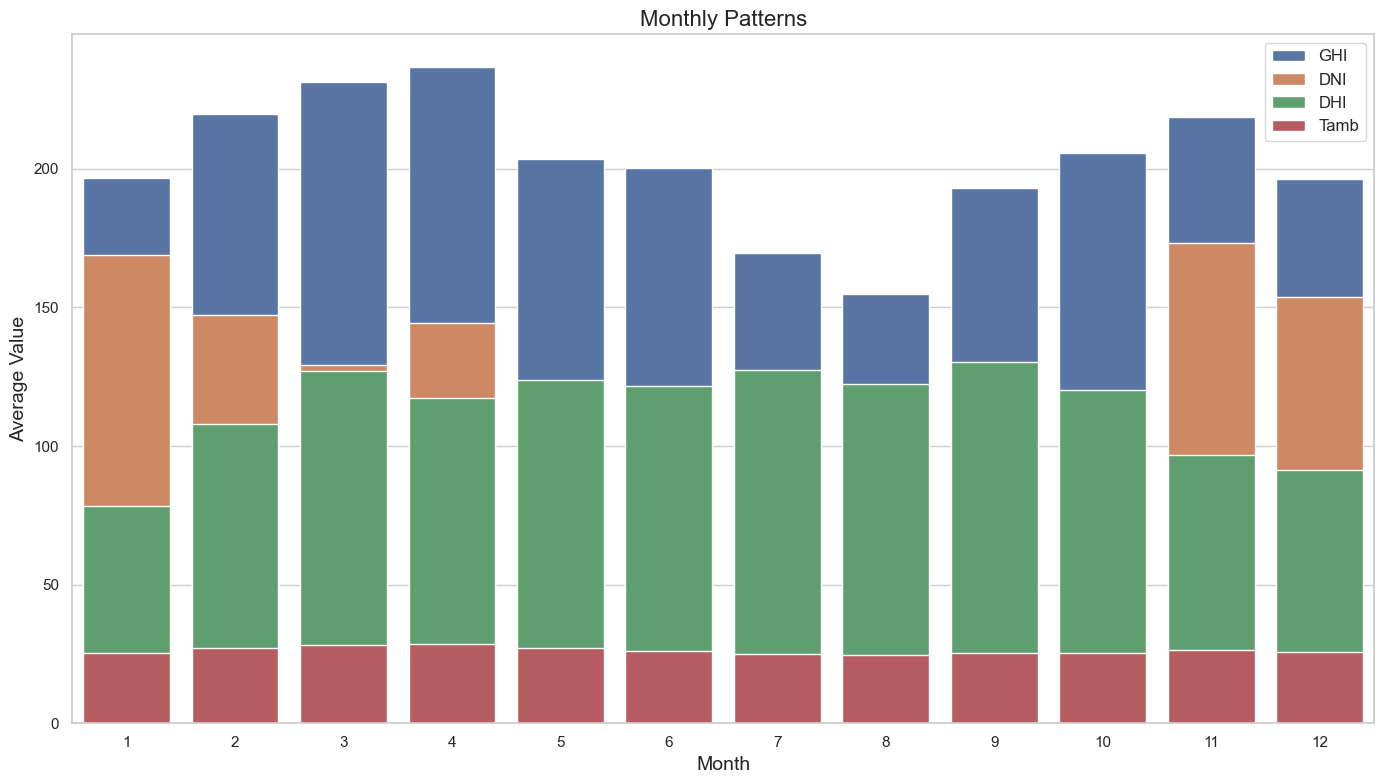

In [8]:
# 2. Plot monthly patterns for the columns
# Plot monthly patterns for the specified columns
time_series.plot_monthly_patterns(['GHI', 'DNI', 'DHI', 'Tamb'])


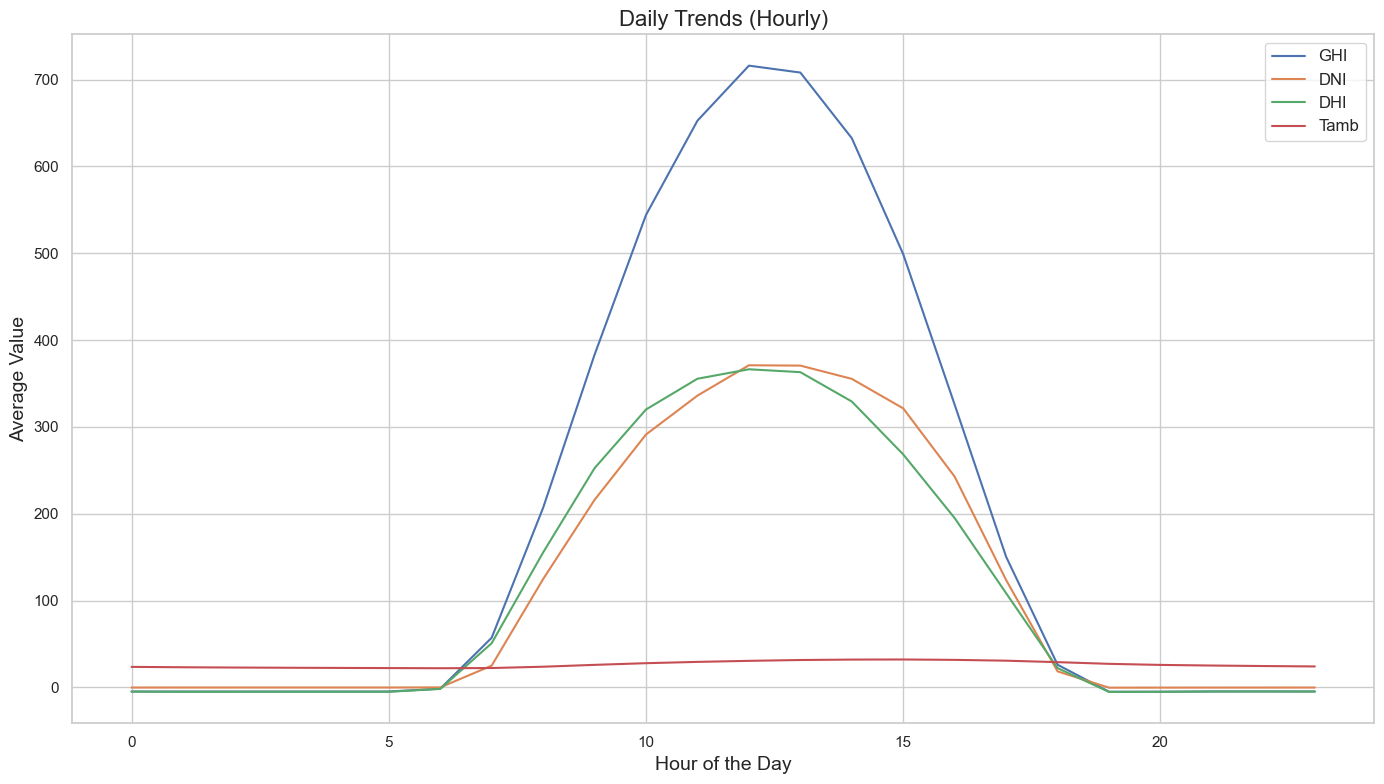

In [9]:
# 3. Plot daily trends (hourly averages)
time_series.plot_daily_trends(['GHI', 'DNI', 'DHI', 'Tamb'])

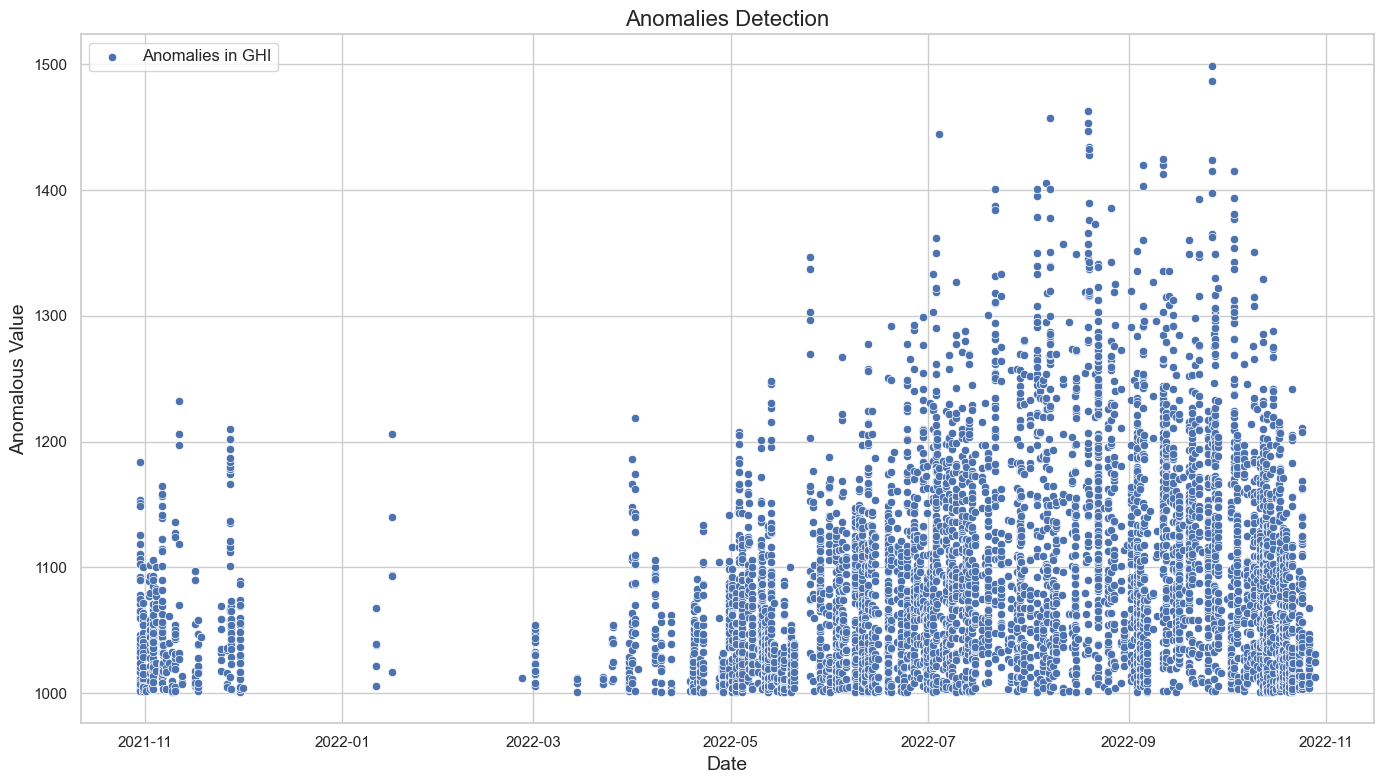

In [10]:
# 4. Detect and plot anomalies
threshold_value = 1000  # Set an appropriate threshold for your data
time_series.plot_anomalies(['GHI', 'DNI', 'DHI', 'Tamb'], threshold=threshold_value)

In [11]:
from correlation_analysis import CorrelationAnalysis

In [12]:
# Initialize the Visualization class
ca = CorrelationAnalysis(df)


In [13]:
# Define the columns of interest
columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']



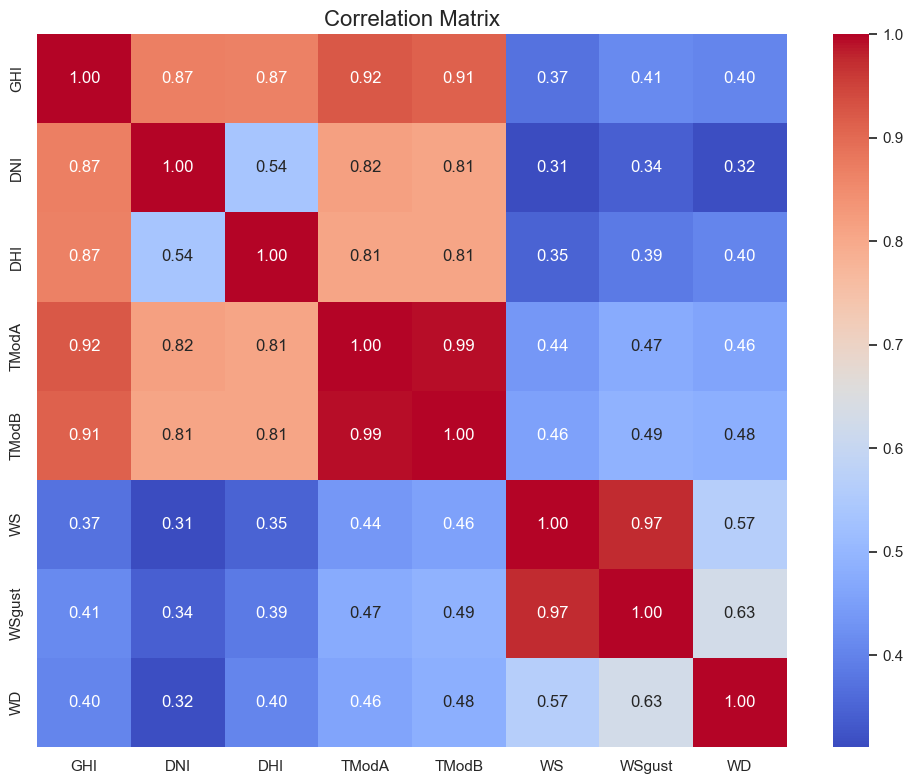

In [14]:
# 1. Plot the correlation matrix
ca.plot_correlation_matrix(columns_of_interest)


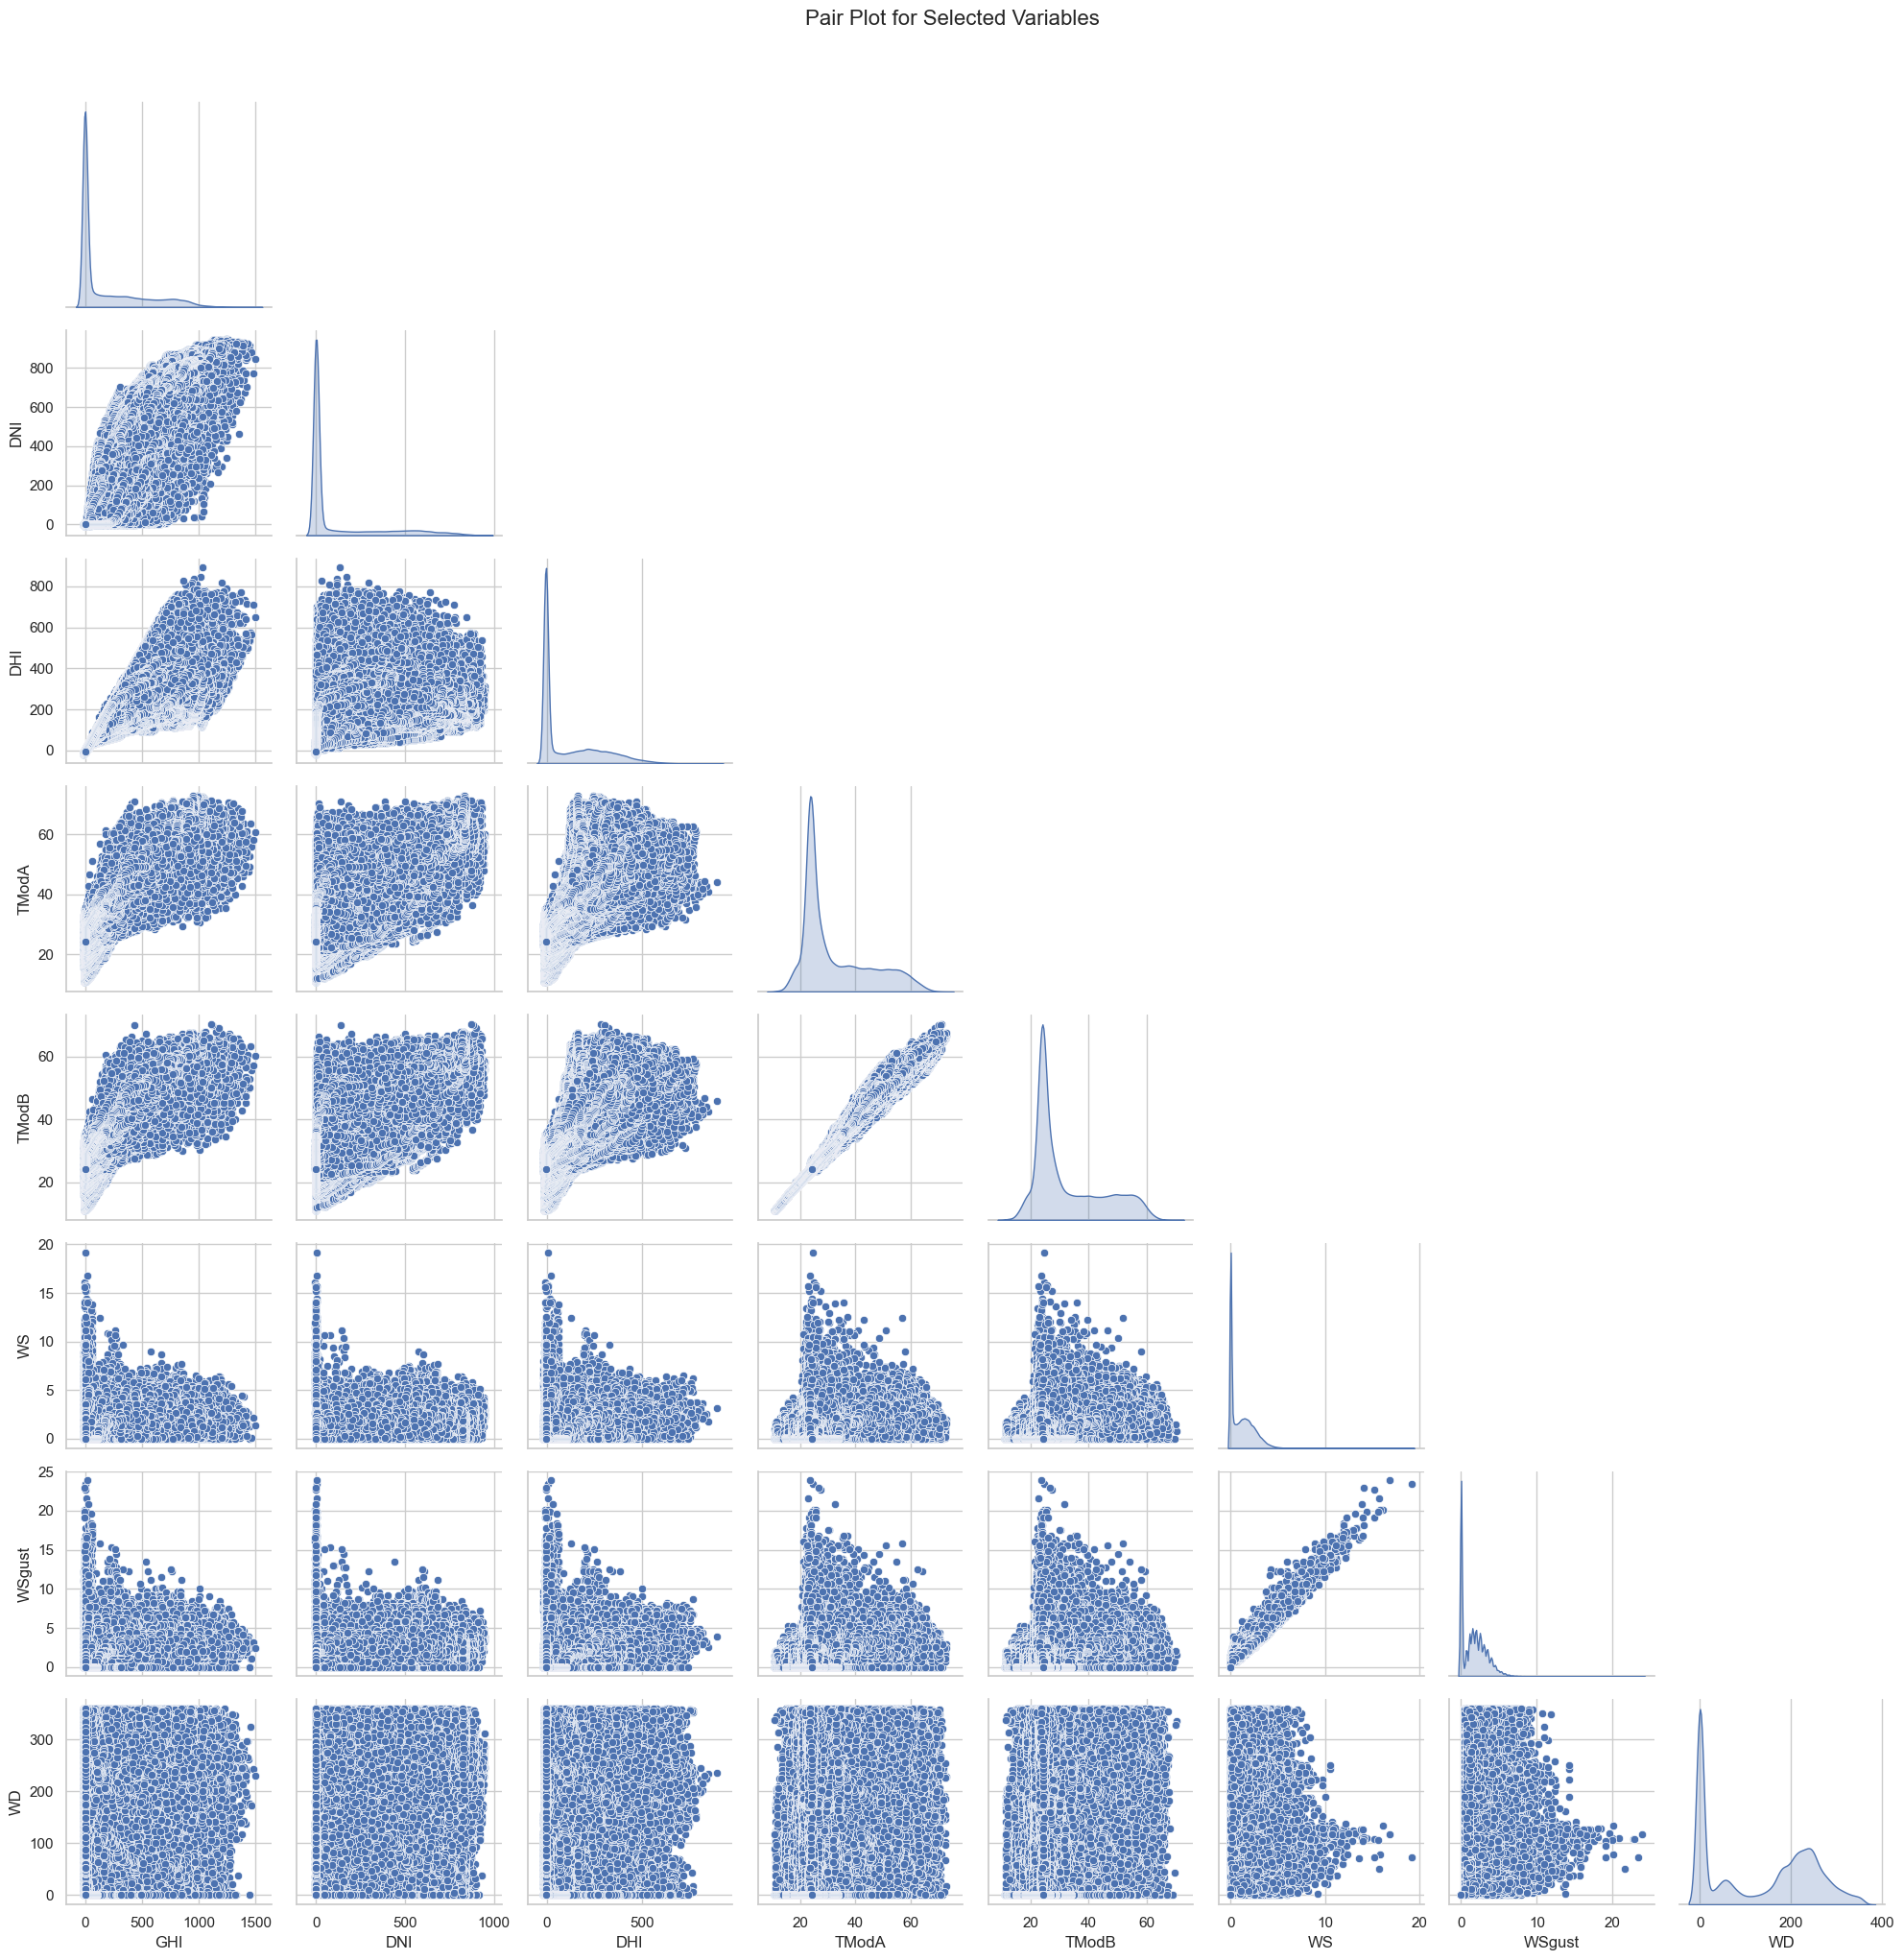

In [15]:

# 2. Plot the pairplot
ca.plot_pairplot(columns_of_interest)


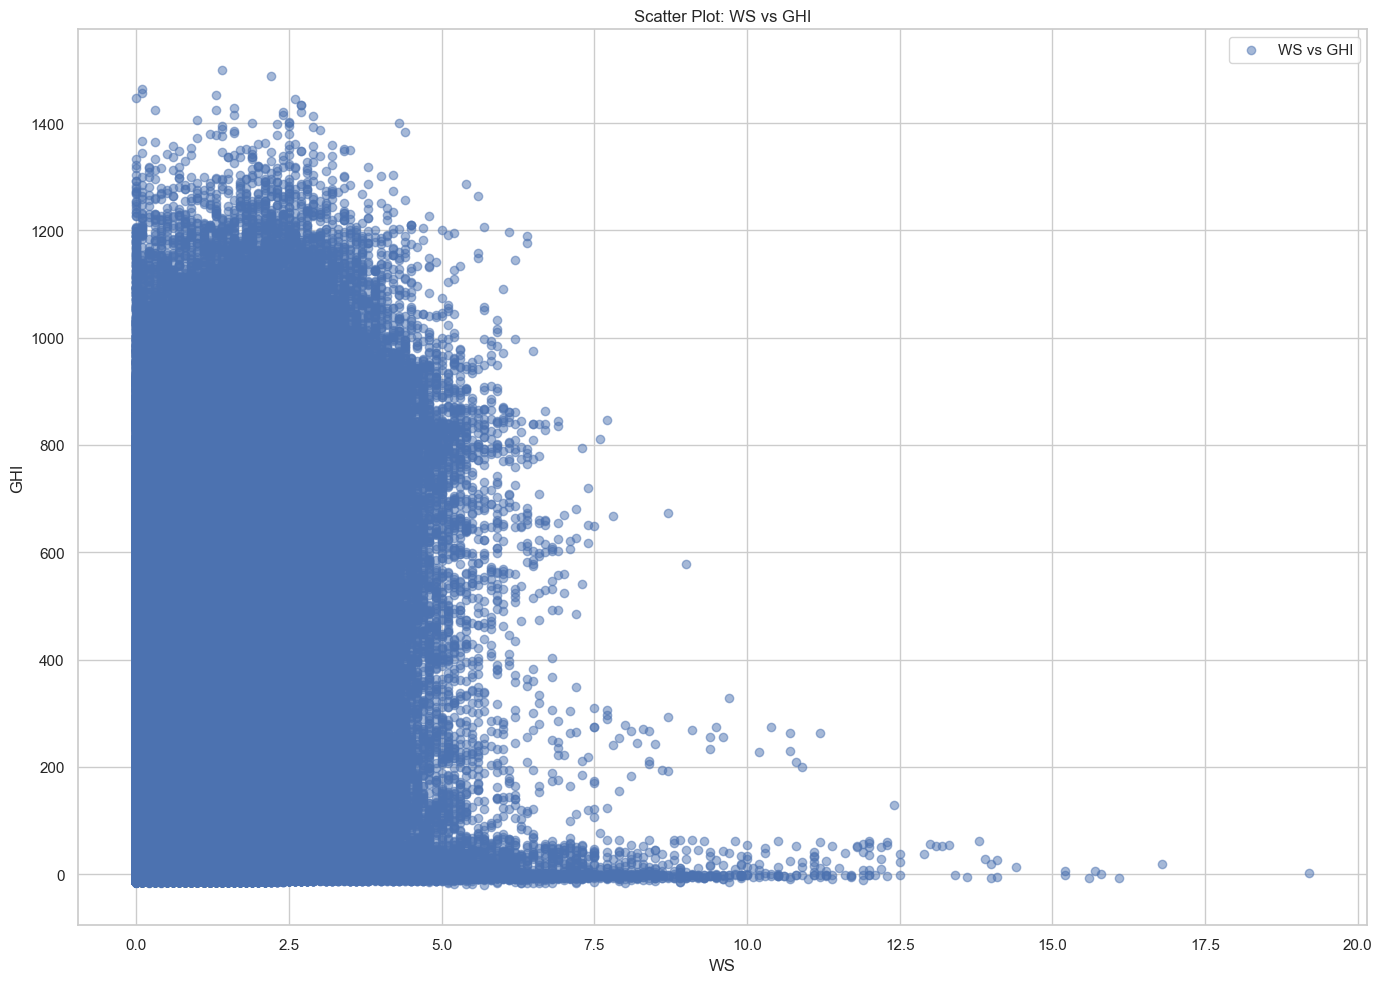

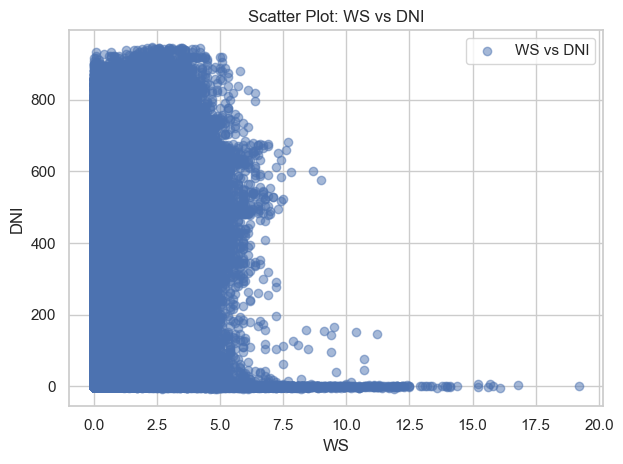

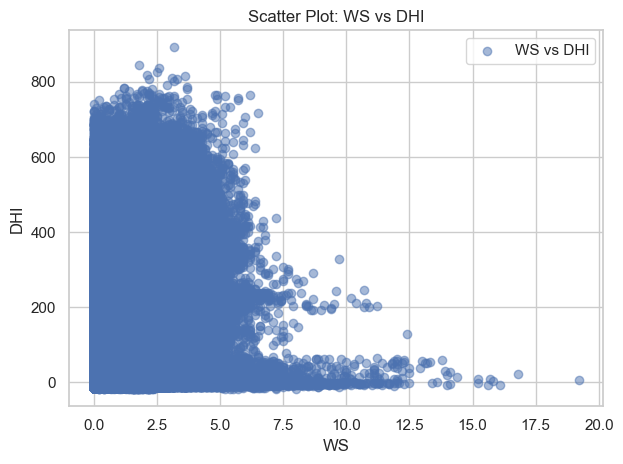

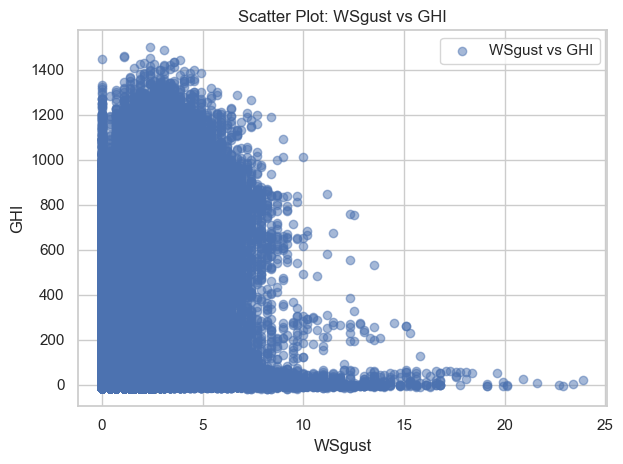

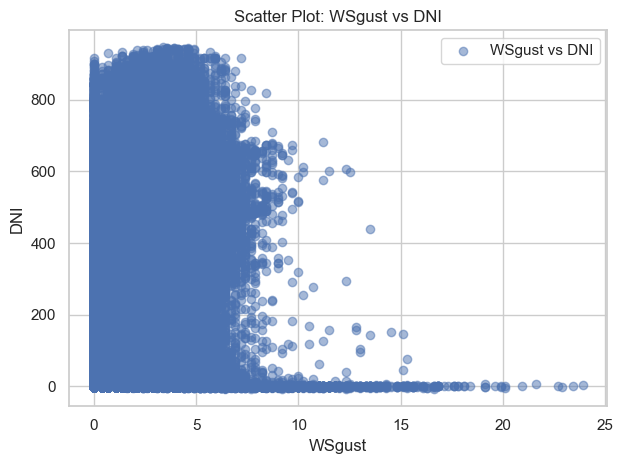

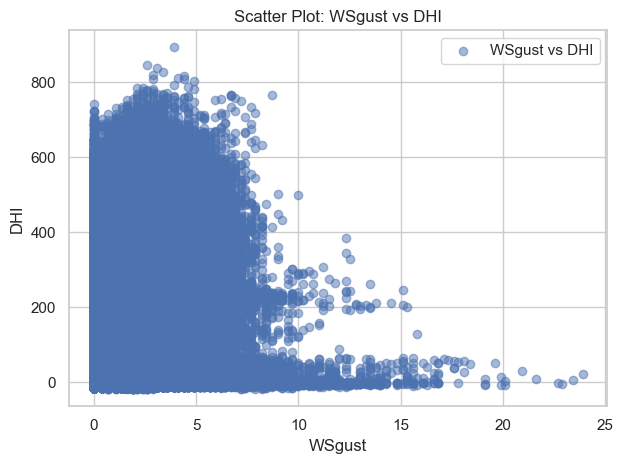

c:\Users\azazh.wuletawu\Documents\10-academy\projects\week-0\solar-power-analytics\scripts\correlation_analysis.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\azazh.wuletawu\Documents\10-academy\projects\week-0\solar-power-analytics\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


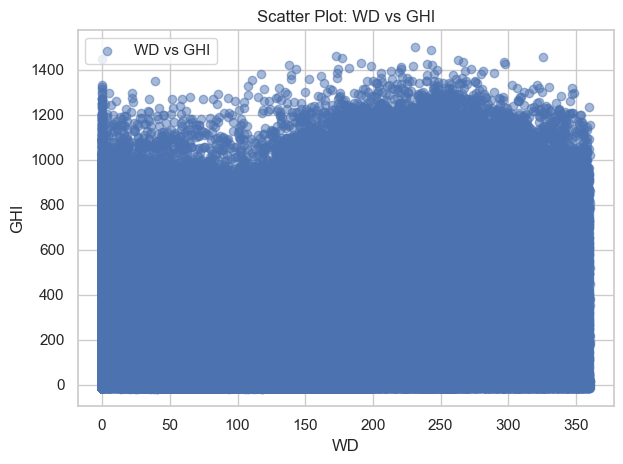

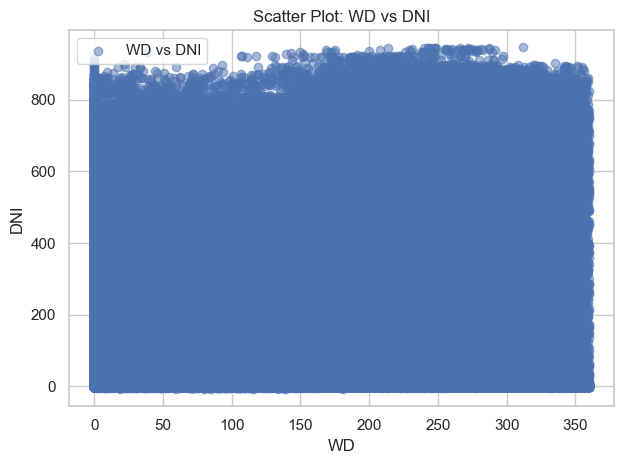

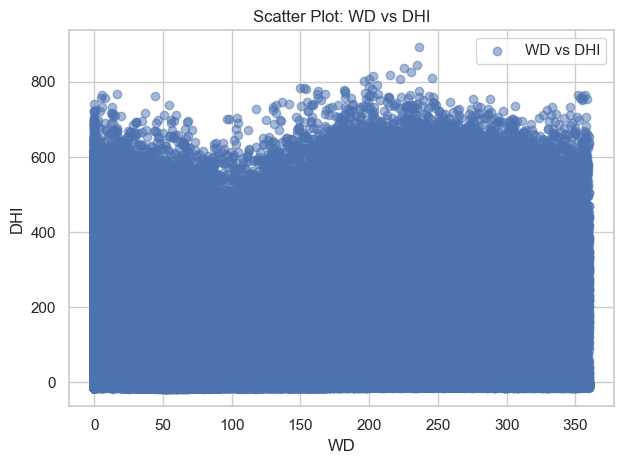

In [16]:

# 3. Plot wind conditions vs solar irradiance
wind_columns = ['WS', 'WSgust', 'WD']
solar_columns = ['GHI', 'DNI', 'DHI']
ca.plot_wind_vs_solar(wind_columns, solar_columns)

In [17]:
# Import the class
from summary_statistics import SummaryStatistics


In [18]:
# Load your dataset
# Example: df = pd.read_csv('your_data.csv')

# Initialize the SummaryStatistics class
stats = SummaryStatistics(df)

In [19]:
# Calculate and display summary statistics
summary = stats.calculate_summary_statistics()
print("Summary Statistics:\n", summary)

Summary Statistics:
                   count        mean         std    min     25%     50%  \
GHI            525600.0  201.957515  298.495150  -19.5   -2.80     0.3   
DNI            525600.0  116.376337  218.652659   -7.8   -0.30    -0.1   
DHI            525600.0  113.720571  158.946032  -17.9   -3.80    -0.1   
ModA           525600.0  206.643095  300.896893    0.0    0.00     3.6   
ModB           525600.0  198.114691  288.889073    0.0    0.00     3.4   
Tamb           525600.0   26.319394    4.398605   12.3   23.10    25.3   
RH             525600.0   79.448857   20.520775    9.9   68.70    85.4   
WS             525600.0    1.146113    1.239248    0.0    0.00     0.8   
WSgust         525600.0    1.691606    1.617053    0.0    0.00     1.6   
WSstdev        525600.0    0.363823    0.295000    0.0    0.00     0.4   
WD             525600.0  133.044668  114.284792    0.0    0.00   161.5   
WDstdev        525600.0    7.172220    7.535093    0.0    0.00     6.2   
BP             52

In [20]:
# Save the summary statistics to a CSV file (optional)
summary.to_csv('summary_statistics.csv', index=True)

In [21]:
from weather_analysis import WeatherAnalysis


In [22]:
# Load your dataset
# Example: df = pd.read_csv('your_data.csv')

In [23]:
weather_analysis = WeatherAnalysis(data=df)


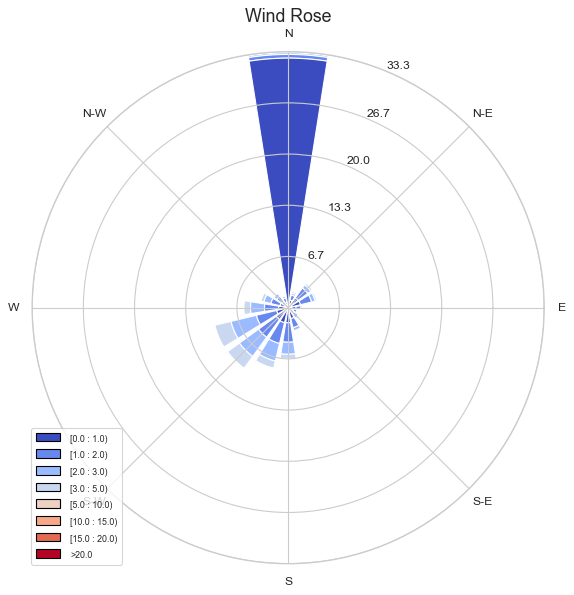

In [24]:

# Plot a wind rose
weather_analysis.plot_wind_rose(wind_speed_col='WS', wind_dir_col='WD')


c:\Users\azazh.wuletawu\Documents\10-academy\projects\week-0\solar-power-analytics\scripts\weather_analysis.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sector_avg = wind_data.groupby('sector')[wind_speed_col].mean()


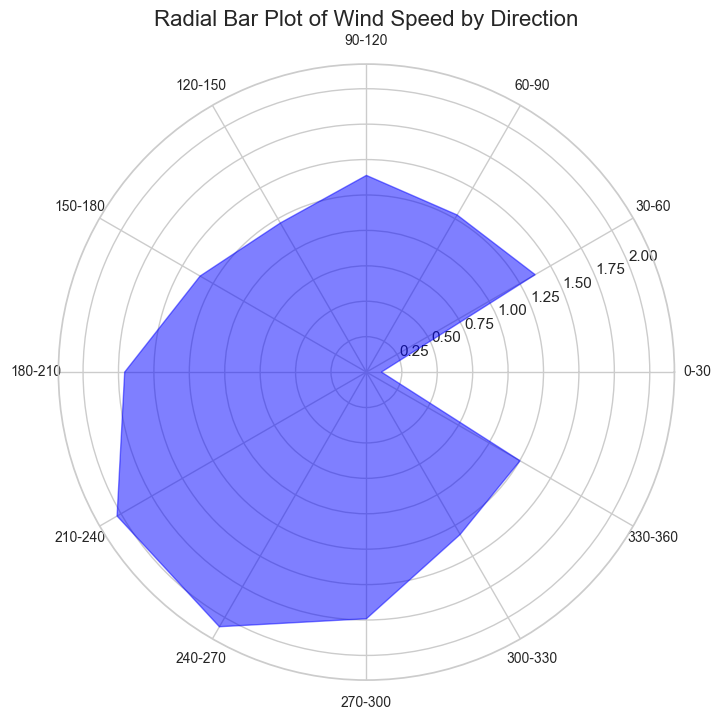

In [25]:

# Plot a radial bar chart
weather_analysis.plot_radial_bar(wind_speed_col='WS', wind_dir_col='WD', num_bins=12)


In [26]:
print(weather_analysis.data.columns)


Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments', 'month', 'hour'],
      dtype='object')


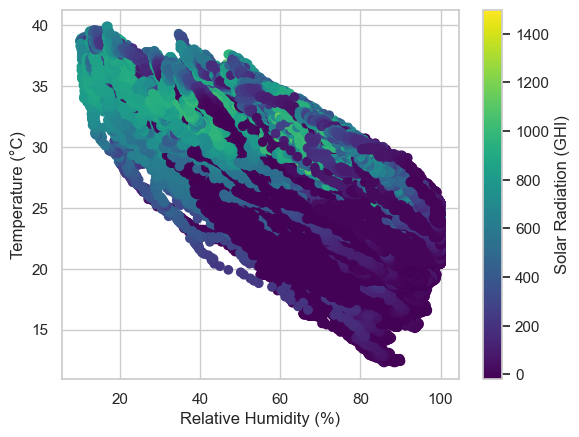

Correlation Matrix:
          Tamb        RH       GHI
Tamb  1.000000 -0.791937  0.641261
RH   -0.791937  1.000000 -0.546677
GHI   0.641261 -0.546677  1.000000


In [27]:
# Perform temperature analysis
weather_analysis.analyze_temperature(temp_col='Tamb', rh_col='RH', solar_rad_col='GHI')


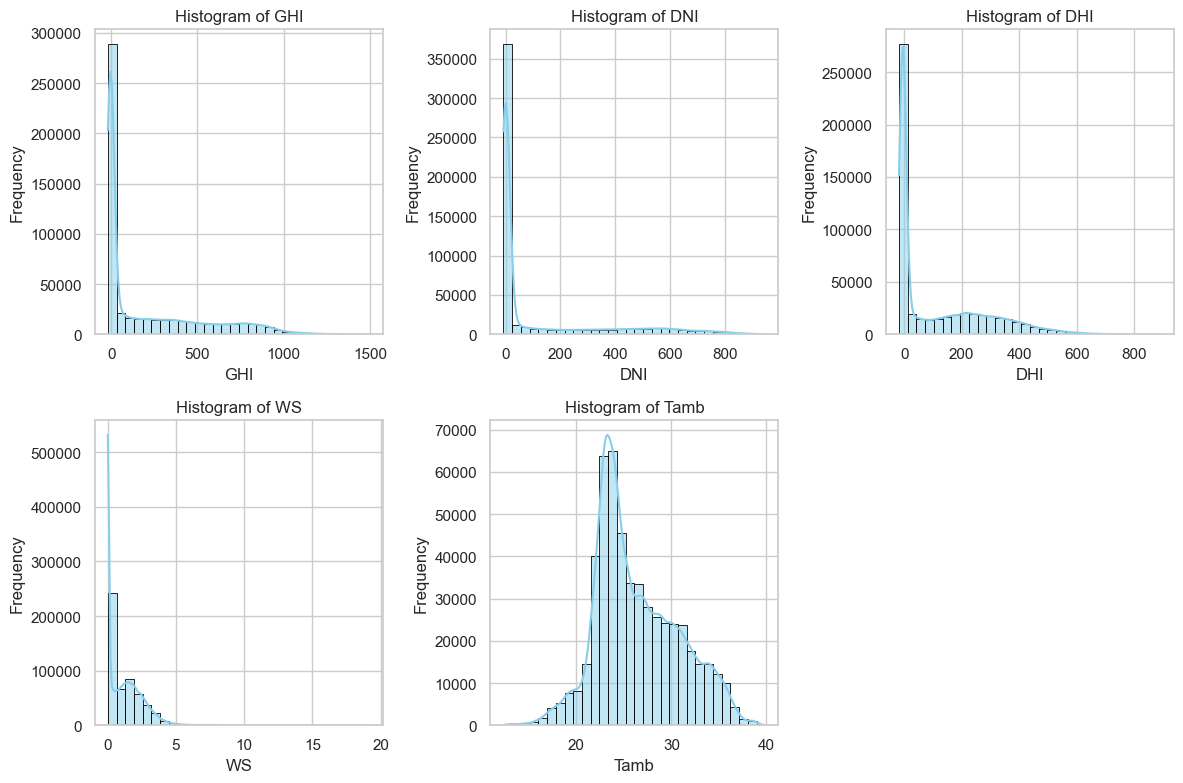

In [28]:
# Assuming you have already created the WeatherAnalysis object 'weather_analysis'
weather_analysis.plot_histograms(columns=['GHI', 'DNI', 'DHI', 'WS', 'Tamb'])


In [29]:
# Specify columns for Z-score analysis
columns_to_analyze = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Perform Z-score analysis
flagged_points = weather_analysis.calculate_z_scores(columns=columns_to_analyze, threshold=3)

# Output flagged points for inspection
for col, flagged in flagged_points.items():
    print(f"Flagged points for {col}:")
    print(flagged)

Processed Z-scores for column 'GHI': Found 2477 flagged points.
Processed Z-scores for column 'DNI': Found 7586 flagged points.
Processed Z-scores for column 'DHI': Found 2986 flagged points.
Processed Z-scores for column 'WS': Found 3967 flagged points.
Processed Z-scores for column 'Tamb': Found 192 flagged points.
Flagged points for GHI:
                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-10-30 11:04:00  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1  0.1   
2021-10-30 11:12:00  1154.0  755.7  491.3  1237.0  1208.0  27.0  82.4  1.2   
2021-10-30 13:01:00  1111.0  812.0  361.4  1189.0  1162.0  29.5  73.0  0.7   
2021-10-30 13:02:00  1126.0  815.0  373.3  1202.0  1175.0  29.7  72.4  0.6   
2021-10-30 13:03:00  1151.0  813.0  400.1  1226.0  1198.0  30.0  72.2  2.1   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-10-24 13:08:00  1134.0  674.

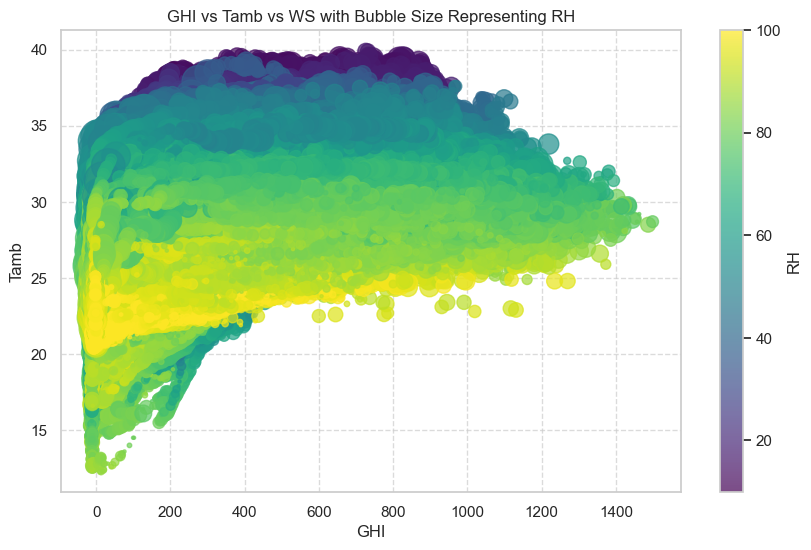

In [30]:
# Create a bubble chart
weather_analysis.create_bubble_chart(
    x_col='GHI',
    y_col='Tamb',
    size_col='WS',
    color_col='RH',  # Optional: Use RH for bubble color
    title="GHI vs Tamb vs WS with Bubble Size Representing RH"
)
